<a href="https://colab.research.google.com/github/AIRJK/CPA-Attack/blob/master/One_Order_CPA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

原始数据处理（提取明文及能量迹）


In [ ]:
import os
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import time
import csv
start = time.process_time()

file_old = 'drive/My Drive/CpaRawData/90M_Filter/Plaintext.csv'
file_temp = 'drive/My Drive/CpaRawData/90M_Filter/Plaintext2.csv'
 
with open(file_old, 'r', newline='', encoding='gbk') as f_old, \
    open(file_temp, 'w', newline='', encoding='gbk') as f_temp:
    f_csv_old = csv.reader(f_old)
    f_csv_temp = csv.writer(f_temp)
    i = 0
    for rows in f_csv_old:
      i += 1
      if i == 3:                  
        f_csv_temp.writerow(rows)
      if i == 4:
        i = 0
        
plain = np.loadtxt('drive/My Drive/CpaRawData/90M_Filter/Plaintext2.csv',dtype=str)
print(plain)

def readfile(num):
    tmp = np.loadtxt('drive/My Drive/CpaRawData/90M_Filter/Trace000%03d.csv' % num, delimiter="," ,usecols=(1,), dtype=float)
    tmp.T
    # print(tmp)
    return tmp



# print(plaintxt)

power = np.empty([200,8500],dtype = float)
for i in range(1,201):
  tmp = readfile(i)
  for j in range(8500):
    power[i-1][j] = float(tmp[j])
# print(type(power[0][0]))

print(power)
plaintxt = np.empty([200,16],dtype = int)
for i in range(200):
  for j in range(16):
    plaintxt[i][j] = int(plain[i][j],16)
# for i in range(200):
#   for j in range(8500):
#     powertxt[i][j] = float(power[i][j])

np.savetxt('drive/My Drive/CpaRawData/plain.txt', plaintxt, fmt = '%d')
np.savetxt('drive/My Drive/CpaRawData/power.txt', power, fmt = '%f')

    

1-CPA

密钥的第0字节为: 0x11
最佳泄露位置为：378


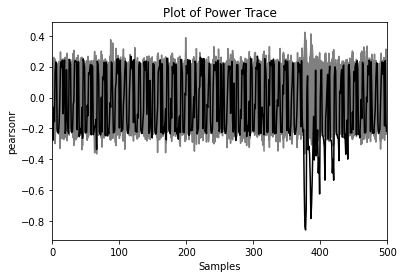

密钥的第1字节为: 0x22
最佳泄露位置为：878


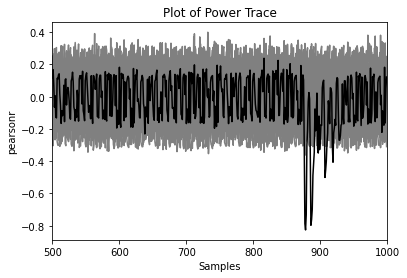

密钥的第2字节为: 0x33
最佳泄露位置为：1378


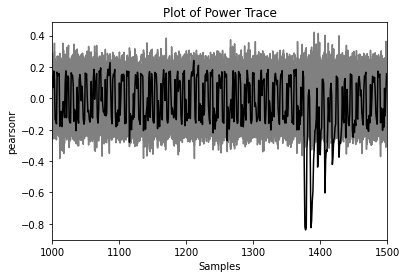

密钥的第3字节为: 0x44
最佳泄露位置为：1878


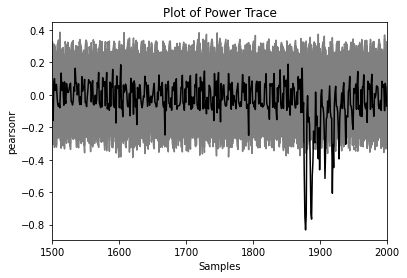

密钥的第4字节为: 0x55
最佳泄露位置为：2377


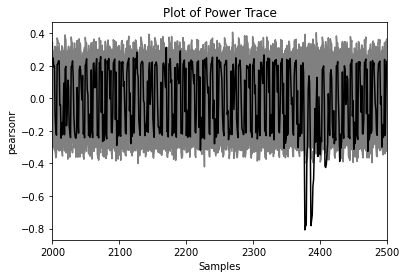

密钥的第5字节为: 0x66
最佳泄露位置为：2878


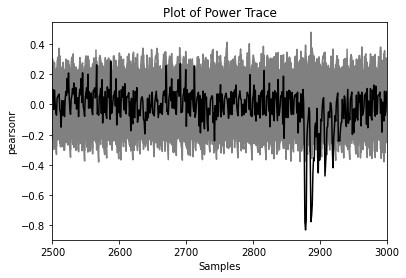

密钥的第6字节为: 0x77
最佳泄露位置为：3378


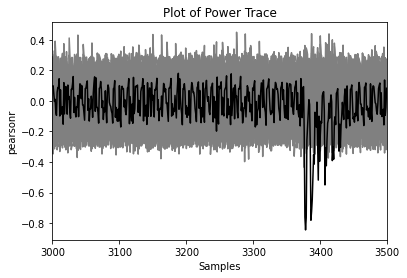

密钥的第7字节为: 0x88
最佳泄露位置为：3878


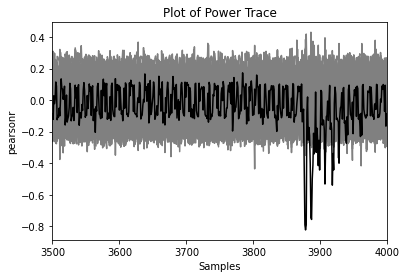

密钥的第8字节为: 0x99
最佳泄露位置为：4378


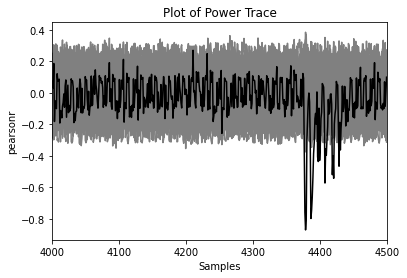

密钥的第9字节为: 0xaa
最佳泄露位置为：4879


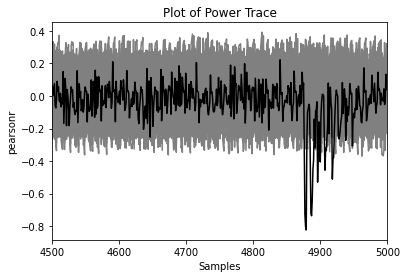

密钥的第10字节为: 0xbb
最佳泄露位置为：5379


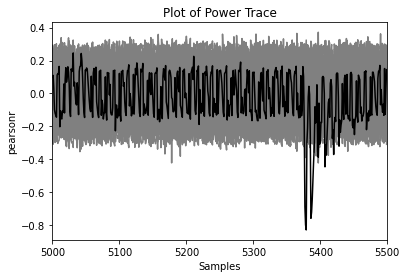

密钥的第11字节为: 0xcc
最佳泄露位置为：5879


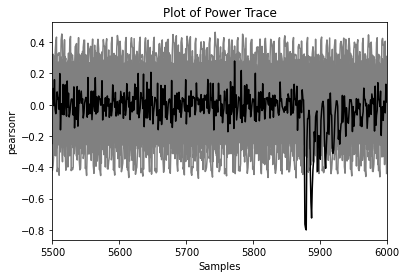

密钥的第12字节为: 0xdd
最佳泄露位置为：6377


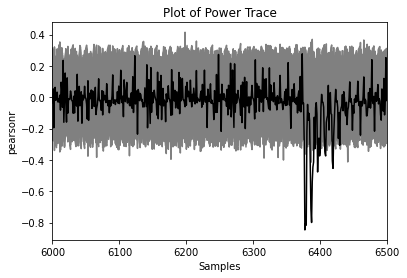

密钥的第13字节为: 0xee
最佳泄露位置为：6878


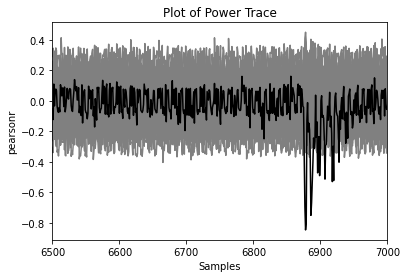

密钥的第14字节为: 0xff
最佳泄露位置为：7378


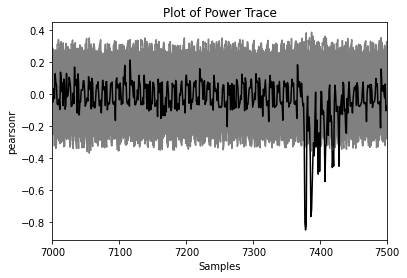

密钥的第15字节为: 0x00
最佳泄露位置为：7877


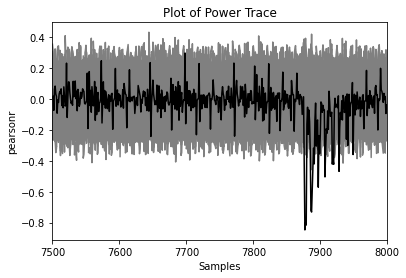

执行时长：357.1574544410005


In [ ]:
import os
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import time
import csv

start = time.process_time()

power = np.loadtxt("drive/My Drive/CpaRawData/Wpower.txt", dtype=float)
plain = np.loadtxt("drive/My Drive/CpaRawData/Wplain.txt", dtype=np.int)



sbox = np.array([0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
], dtype = np.uint8)


def hamming_weight(x):
  return bin(x).count("1")



def CPA(num):
  
  corr = np.empty((256, 500), dtype=np.double)

  x = []
  y = []

  HW = np.empty((100, 256), dtype=np.uint8)

  for g in range(256):
    for l in range(100):
      s0 = plain[l][num]^g
      s1 = sbox[s0]
      HW[l][g] = hamming_weight(s1)
  
  for i in range(256):
      for j in range(num*500,(num+1)*500):
          for k in range(100):
              x.append(HW[k][i])
              y.append(power[k][j])
          corr[i][j-num*500]=stats.pearsonr(x,y)[0]
          #print("key: %d Time: %d"%(i, j))
          #print(stats.pearsonr(x, y))

          x.clear()
          y.clear()
  value = np.argmin(corr)
  key = int(value/500)
  lp = value%500+num*500
  xx = range(num*500, (num+1)*500)
  
  print("密钥的第%d字节为: 0x%02x"%(num, key))
  print("最佳泄露位置为：%d"%lp)
  for i in range(256):
    if (i != key):

        plt.plot(xx, corr[i], color='grey')

  
  plt.plot(xx, corr[key], color = 'black')
  plt.xlim(num*500, (num+1)*500)
  plt.xlabel("Samples")
  plt.ylabel("pearsonr")
  plt.title("Plot of Power Trace")
  plt.show()

for num in range(16):
  CPA(num)

end = time.process_time()

print("执行时长："+str(end-start))




测试某一个字节

In [ ]:
import os
from google.colab import drive
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
import time
import csv

start = time.process_time()

power = np.loadtxt("drive/My Drive/CpaRawData/Wpower.txt", dtype=float)
plain = np.loadtxt("drive/My Drive/CpaRawData/Wplain.txt", dtype=np.int)


num = int(input("请输入攻击第几个字节：\n"))

sbox = np.array([0x63, 0x7C, 0x77, 0x7B, 0xF2, 0x6B, 0x6F, 0xC5, 0x30, 0x01, 0x67, 0x2B, 0xFE, 0xD7, 0xAB, 0x76,
0xCA, 0x82, 0xC9, 0x7D, 0xFA, 0x59, 0x47, 0xF0, 0xAD, 0xD4, 0xA2, 0xAF, 0x9C, 0xA4, 0x72, 0xC0,
0xB7, 0xFD, 0x93, 0x26, 0x36, 0x3F, 0xF7, 0xCC, 0x34, 0xA5, 0xE5, 0xF1, 0x71, 0xD8, 0x31, 0x15,
0x04, 0xC7, 0x23, 0xC3, 0x18, 0x96, 0x05, 0x9A, 0x07, 0x12, 0x80, 0xE2, 0xEB, 0x27, 0xB2, 0x75,
0x09, 0x83, 0x2C, 0x1A, 0x1B, 0x6E, 0x5A, 0xA0, 0x52, 0x3B, 0xD6, 0xB3, 0x29, 0xE3, 0x2F, 0x84,
0x53, 0xD1, 0x00, 0xED, 0x20, 0xFC, 0xB1, 0x5B, 0x6A, 0xCB, 0xBE, 0x39, 0x4A, 0x4C, 0x58, 0xCF,
0xD0, 0xEF, 0xAA, 0xFB, 0x43, 0x4D, 0x33, 0x85, 0x45, 0xF9, 0x02, 0x7F, 0x50, 0x3C, 0x9F, 0xA8,
0x51, 0xA3, 0x40, 0x8F, 0x92, 0x9D, 0x38, 0xF5, 0xBC, 0xB6, 0xDA, 0x21, 0x10, 0xFF, 0xF3, 0xD2,
0xCD, 0x0C, 0x13, 0xEC, 0x5F, 0x97, 0x44, 0x17, 0xC4, 0xA7, 0x7E, 0x3D, 0x64, 0x5D, 0x19, 0x73,
0x60, 0x81, 0x4F, 0xDC, 0x22, 0x2A, 0x90, 0x88, 0x46, 0xEE, 0xB8, 0x14, 0xDE, 0x5E, 0x0B, 0xDB,
0xE0, 0x32, 0x3A, 0x0A, 0x49, 0x06, 0x24, 0x5C, 0xC2, 0xD3, 0xAC, 0x62, 0x91, 0x95, 0xE4, 0x79,
0xE7, 0xC8, 0x37, 0x6D, 0x8D, 0xD5, 0x4E, 0xA9, 0x6C, 0x56, 0xF4, 0xEA, 0x65, 0x7A, 0xAE, 0x08,
0xBA, 0x78, 0x25, 0x2E, 0x1C, 0xA6, 0xB4, 0xC6, 0xE8, 0xDD, 0x74, 0x1F, 0x4B, 0xBD, 0x8B, 0x8A,
0x70, 0x3E, 0xB5, 0x66, 0x48, 0x03, 0xF6, 0x0E, 0x61, 0x35, 0x57, 0xB9, 0x86, 0xC1, 0x1D, 0x9E,
0xE1, 0xF8, 0x98, 0x11, 0x69, 0xD9, 0x8E, 0x94, 0x9B, 0x1E, 0x87, 0xE9, 0xCE, 0x55, 0x28, 0xDF,
0x8C, 0xA1, 0x89, 0x0D, 0xBF, 0xE6, 0x42, 0x68, 0x41, 0x99, 0x2D, 0x0F, 0xB0, 0x54, 0xBB, 0x16
], dtype = np.uint8)

HW = np.empty((100, 256), dtype=np.uint8)
corr = np.empty((256, 1500), dtype=np.double)
x = []
y = []

def hamming_weight(x):
    return bin(x).count("1")

for g in range(256):
    for l in range(100):
        s0 = plain[l][num]^g
        s1 = sbox[s0]
        HW[l][g] = hamming_weight(s1)


for i in range(256):
    for j in range(1500):
        for k in range(100):
            x.append(HW[k][i])
            y.append(power[k][j])
        corr[i][j]=stats.pearsonr(x,y)[0]
        print("key: %d Time: %d"%(i, j))
        print(stats.pearsonr(x, y))

        x.clear()
        y.clear()
value = np.argmin(corr)
key = int(value/1500)
lp = value%1500

print("密钥的第%d字节为: 0x%02x"%(num, key))
print("最佳泄露位置为：%d"%lp)

end = time.process_time()

print("执行时长："+str(end-start))

for i in range(256):
    if (i != key):

        plt.plot(corr[i], color='grey')


plt.plot(corr[key], color = 'black')
plt.xlabel("Samples")
plt.ylabel("pearsonr")
plt.title("Plot of Power Trace")
plt.show()
